In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

Text(0, 0.5, 'Correlation')

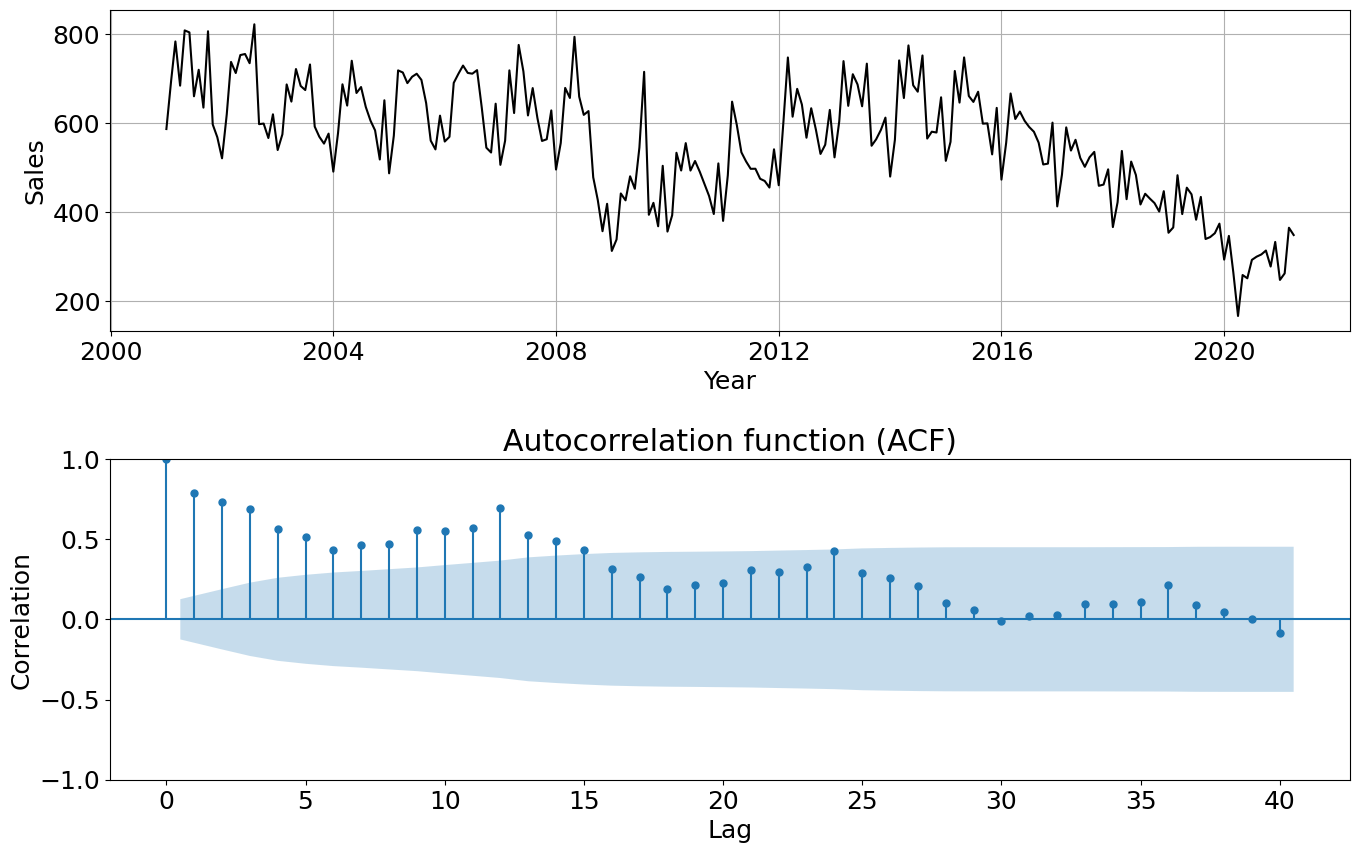

In [7]:
df = pd.read_csv('Auto_sales.csv', sep=';', decimal= ',', parse_dates=['Date'],index_col='Date')

plt.rcParams.update({'font.size':18})

fig, axes = plt.subplots(2,1,figsize=(16,10), dpi = 100)
plt.subplots_adjust(hspace = 0.4)


axes[0].plot(df.index,df.Auto_sales, \
    color='k', label='Actual vehicle sales')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Sales')
axes[0].grid()


plot_acf(df.Auto_sales, alpha=0.05, lags=40, \
    ax=axes[1], title='Autocorrelation function (ACF)')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Correlation')

In [8]:
car_diff = df.Auto_sales.diff().dropna()

In [9]:
def plot_acf_pacf(data):
    
    # prepare the plot
    fig, axes = plt.subplots(2, 1, \
        figsize=(16,10), dpi=100)
    plt.subplots_adjust(hspace=0.3)

    # ACF
    plot_acf(data, alpha=0.05, ax=axes[0],\
        title='Autocorrelation function (ACF)')
    axes[0].set_xlabel('Lag')
    axes[0].set_ylabel('Correlation')

    # PACF
    plot_pacf(data, alpha=0.05, ax=axes[1],\
        title='Partial Autocorrelation function (PACF)')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')

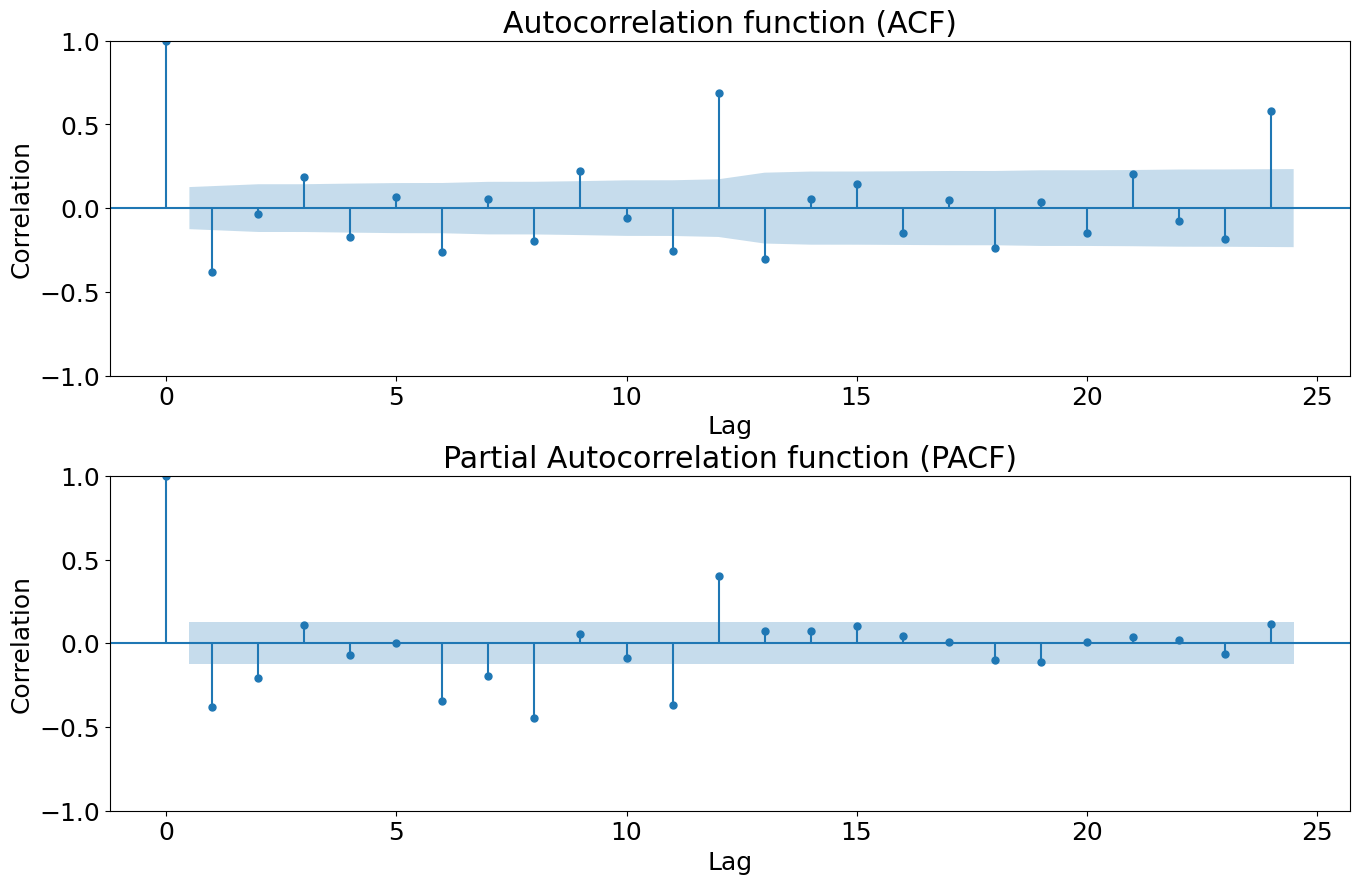

In [10]:
plot_acf_pacf(car_diff)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                          Auto_sales   No. Observations:                  244
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1314.801
Date:                             Wed, 16 Oct 2024   AIC                           2635.603
Time:                                     13:58:26   BIC                           2646.082
Sample:                                 01-01-2001   HQIC                          2639.824
                                      - 04-01-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4984      0.041    -12.180      0.000      -0.579      -0.418
ar.S.L12       0.7229      

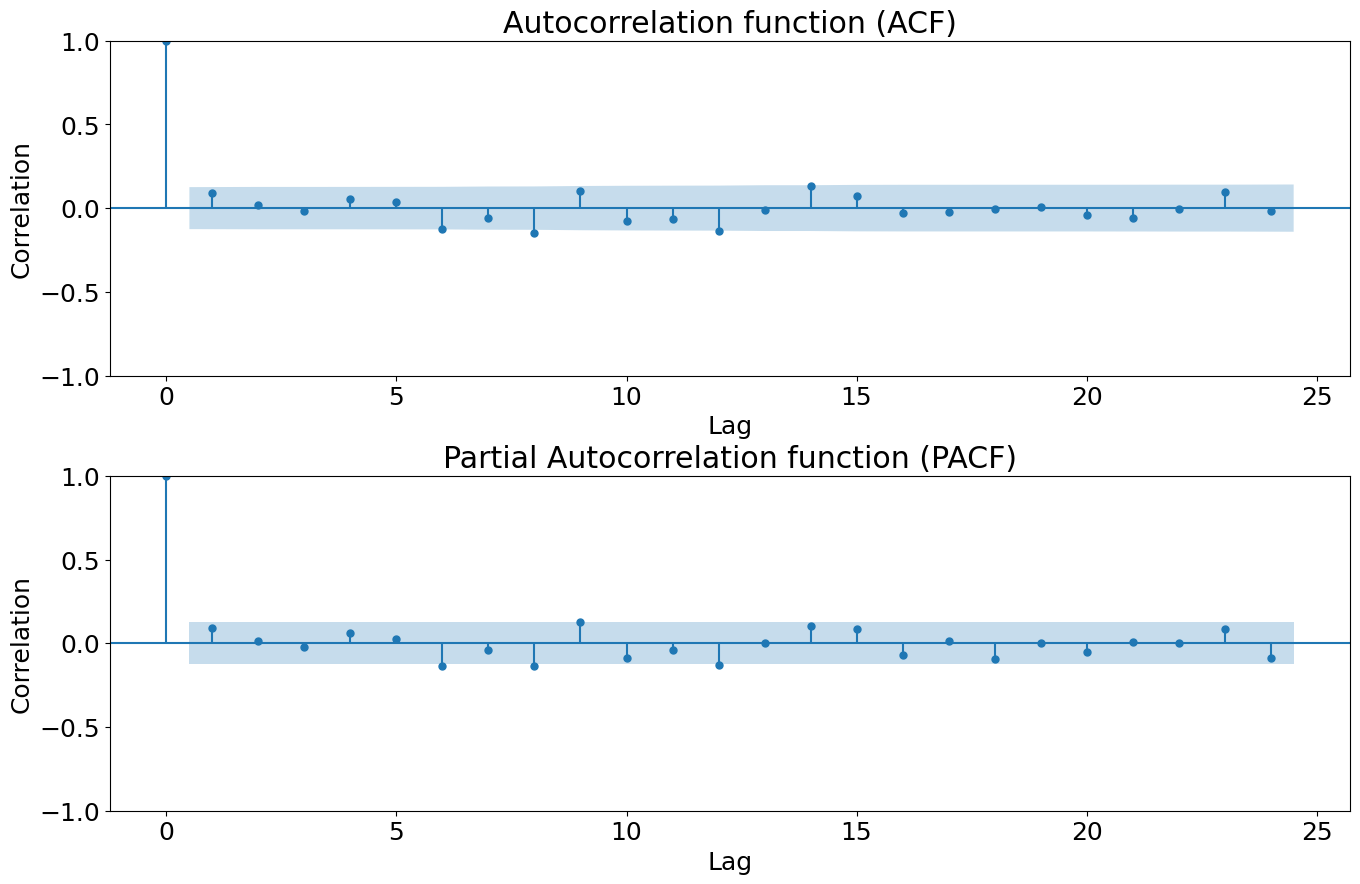

In [11]:
X = df.Auto_sales
order = (0, 1, 1) # (p, d, q)
seasonal_order = (1, 0, 0, 12) # (P, D, Q, s)

model=SARIMAX(endog=X, exog= None, trend = 'n', order=order, enforce_invertibility=True,enforce_stationarity=True,seasonal_order=seasonal_order)

m_sarima6=model.fit()

print(m_sarima6.summary())

plot_acf_pacf(m_sarima6.resid)